# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary
content_text = '/content/drive/My Drive/SMAI_Assignment_2/Q4/wifiLocalization.txt'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [97]:
# your code here

### Calculate priors

Write a function to calculate the priors for each class.

In [98]:
# your code here

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [99]:
# your code here

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [100]:
data = pd.read_csv(content_text, sep='\t')
print(data.columns)
y = data.r
print(data.shape)
# data = data.drop('r', axis=1)
# print(data.shape)
data.head()

Index(['ws1', 'ws2', 'ws3', 'ws4', 'ws5', 'ws6', 'ws7', 'r'], dtype='object')
(2000, 8)


ws1  ws2  ws3  ws4  ws5  ws6  ws7  r
0  -47  -53  -54  -49  -63  -88  -85  3
1  -50  -57  -60  -43  -66  -77  -82  3
2  -44  -50  -57  -45  -61  -72  -67  2
3  -48  -59  -53  -45  -74  -81  -81  3
4  -60  -54  -59  -65  -66  -83  -84  1

In [101]:
y.head()


0    3
1    3
2    2
3    3
4    1
Name: r, dtype: int64

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [102]:
# your code here
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)
data_cols = data.columns

In [103]:
npdata = x_train.to_numpy()

index_dict = {}
unique_classes = y.unique()
class_dataframe = {}
dataframe_size = {}
total_size = len(x_train)
classes_index_dict= {}

for c in unique_classes:
    class_dataframe[c] = x_train[x_train['r'] == c].drop('r', axis=1)
    class_dataframe[c] = class_dataframe[c].to_numpy()
    dataframe_size[c] = class_dataframe[c].shape[0]
    index_dict = {}
    # col_dict = {}
    print("FOR CLASS :", c)
    print(class_dataframe[c])

    for col in range(class_dataframe[c].shape[1]):
        # print(class_dataframe[c][col], "="*5, npdata[col][2])
        mean_value = np.mean(class_dataframe[c][:, col])
        std_value = np.std(class_dataframe[c][:, col])
        var_value = np.var(class_dataframe[c][:, col])
        # col_dict[data_cols[col]] = [mean_value, std_value, var_value]
        index_dict[col] = [mean_value, std_value, var_value]

    classes_index_dict[c] = index_dict

for val in classes_index_dict.items():
  print(val)

FOR CLASS : 3
[[-50 -58 -54 ... -60 -80 -82]
 [-46 -55 -48 ... -62 -80 -79]
 [-47 -57 -49 ... -63 -84 -86]
 ...
 [-46 -54 -53 ... -64 -78 -79]
 [-50 -52 -52 ... -67 -80 -89]
 [-48 -54 -54 ... -67 -77 -89]]
FOR CLASS : 2
[[-37 -60 -53 ... -64 -68 -67]
 [-38 -55 -53 ... -72 -71 -73]
 [-37 -51 -54 ... -60 -69 -70]
 ...
 [-38 -58 -59 ... -66 -74 -67]
 [-40 -55 -47 ... -64 -75 -79]
 [-41 -58 -48 ... -62 -72 -76]]
FOR CLASS : 1
[[-70 -62 -62 ... -69 -88 -86]
 [-63 -52 -61 ... -75 -80 -83]
 [-64 -60 -63 ... -72 -86 -84]
 ...
 [-61 -58 -60 ... -73 -81 -82]
 [-59 -54 -56 ... -74 -79 -85]
 [-62 -64 -62 ... -75 -82 -86]]
FOR CLASS : 4
[[-59 -56 -49 ... -52 -88 -84]
 [-63 -58 -57 ... -52 -89 -93]
 [-56 -60 -55 ... -53 -88 -85]
 ...
 [-59 -50 -45 ... -45 -88 -87]
 [-61 -62 -54 ... -46 -93 -98]
 [-60 -52 -45 ... -51 -87 -80]]
(3, {0: [-49.74386920980926, 2.62347591968176, 6.882625901150057], 1: [-54.83923705722071, 3.6418379445142257, 13.262983614103602], 2: [-52.787465940054496, 3.1877756731031015,

In [104]:
def get_gaussian(value, mean, std, variance):
    return (1/np.sqrt(np.pi*variance*2)) * np.exp(-0.5*((value-mean)/std)**2)

In [105]:
print(x_test)

print(x_test.drop('r', axis=1).to_numpy())
x_test = x_test.drop('r', axis=1)
y_test = y_test.to_numpy()

      ws1  ws2  ws3  ws4  ws5  ws6  ws7  r
674   -53  -58  -50  -52  -66  -78  -79  3
1699  -48  -57  -54  -50  -66  -83  -78  3
1282  -58  -55  -50  -60  -48  -87  -93  4
1315  -40  -56  -58  -42  -67  -62  -71  2
1210  -46  -56  -52  -51  -62  -85  -81  3
...   ...  ...  ...  ...  ...  ...  ... ..
537   -51  -58  -55  -54  -67  -86  -83  3
1450  -56  -53  -42  -61  -55  -87  -82  4
1919  -37  -54  -55  -37  -67  -71  -70  2
255   -59  -55  -46  -66  -50  -86  -91  4
589   -63  -57  -60  -64  -72  -80  -78  1

[500 rows x 8 columns]
[[-53 -58 -50 ... -66 -78 -79]
 [-48 -57 -54 ... -66 -83 -78]
 [-58 -55 -50 ... -48 -87 -93]
 ...
 [-37 -54 -55 ... -67 -71 -70]
 [-59 -55 -46 ... -50 -86 -91]
 [-63 -57 -60 ... -72 -80 -78]]


In [106]:
print(type(x_test))

x_trains = x_train.drop('r', axis=1)
y_train = y_train.to_numpy()
x_test.shape, x_trains.shape

<class 'pandas.core.frame.DataFrame'>


((500, 7), (1500, 7))

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [107]:


def get_guassian_bayes(x_test, y_test):
    wrong_classification_x = []
    wrong_classification_y = []
    all_pred = []
    random = 0
    for row in x_test.to_numpy():
        prediction = -1
        max_till_now = -float('inf')
        for c in unique_classes:
            index_dict = classes_index_dict[c]
            ans = dataframe_size[c]/total_size
            # print("ROW :", row)
            # print(random)
            # random+=1
            for val in range(len(row)):
                ans *= get_gaussian(row[val], index_dict[val][0], index_dict[val][1], index_dict[val][2])
            if(ans > max_till_now):
                max_till_now = ans
                prediction = c
        all_pred.append(prediction)

    count = 0
    for i in range(len(y_test)):
        # print(y_test[i], all_pred[i])
        if y_test[i] == all_pred[i]:
            count+=1
        else:
            wrong_classification_x.append(x_test.iloc[i])
            wrong_classification_y.append(y_test[i])


    print("Accuracy :", count/len(y_test)*100)
    return wrong_classification_x, wrong_classification_y

In [108]:
wrong_classification_x, wrong_classification_y = get_guassian_bayes(x_trains, y_train)

Accuracy : 98.2


In [109]:
wrong_classification_x, wrong_classification_y = get_guassian_bayes(x_test, y_test)

Accuracy : 99.0


In [110]:
wrong_classification_x, wrong_classification_y

([ws1   -61
  ws2   -55
  ws3   -55
  ws4   -66
  ws5   -61
  ws6   -83
  ws7   -92
  Name: 87, dtype: int64, ws1   -58
  ws2   -50
  ws3   -55
  ws4   -54
  ws5   -61
  ws6   -84
  ws7   -87
  Name: 510, dtype: int64, ws1   -45
  ws2   -59
  ws3   -54
  ws4   -51
  ws5   -69
  ws6   -77
  ws7   -85
  Name: 1546, dtype: int64, ws1   -60
  ws2   -54
  ws3   -54
  ws4   -60
  ws5   -64
  ws6   -88
  ws7   -88
  Name: 1638, dtype: int64, ws1   -57
  ws2   -58
  ws3   -56
  ws4   -55
  ws5   -71
  ws6   -84
  ws7   -87
  Name: 984, dtype: int64], [4, 1, 2, 4, 3])

In [111]:

def get_guassian_bayes_wrong(x_test, y_test):
    random = 0
    d = {}
    wrong_classification_x = []
    wrong_classification_y = []
    all_pred = []

    for row in x_test.to_numpy():
        prediction = -1
        max_till_now = -float('inf')
        for c in unique_classes:
            index_dict = classes_index_dict[c]
            ans = dataframe_size[c]/total_size
            for val in range(len(row)):
                ans *= get_gaussian(row[val], index_dict[val][0], index_dict[val][1], index_dict[val][2])
            if(ans > max_till_now):
                max_till_now = ans
                prediction = c
        all_pred.append(prediction)

    count = 0
    for i in range(len(y_test)):
        # print(y_test[i], all_pred[i])
        if y_test[i] == all_pred[i]:
            count+=1
        else:
            wrong_classification_x.append(x_test.iloc[i])
            wrong_classification_y.append(y_test[i])


    print("Accuracy :", count/len(y_test)*100)
    return wrong_classification_x, wrong_classification_y 

In [112]:
wrong_classification_x, wrong_classification_y = get_guassian_bayes_wrong(x_test, y_test)

Accuracy : 99.0


In [122]:
wrong_classification_x

[ws1   -61
 ws2   -55
 ws3   -55
 ws4   -66
 ws5   -61
 ws6   -83
 ws7   -92
 Name: 87, dtype: int64, ws1   -58
 ws2   -50
 ws3   -55
 ws4   -54
 ws5   -61
 ws6   -84
 ws7   -87
 Name: 510, dtype: int64, ws1   -45
 ws2   -59
 ws3   -54
 ws4   -51
 ws5   -69
 ws6   -77
 ws7   -85
 Name: 1546, dtype: int64, ws1   -60
 ws2   -54
 ws3   -54
 ws4   -60
 ws5   -64
 ws6   -88
 ws7   -88
 Name: 1638, dtype: int64, ws1   -57
 ws2   -58
 ws3   -56
 ws4   -55
 ws5   -71
 ws6   -84
 ws7   -87
 Name: 984, dtype: int64]

In [123]:
wrong_classification_y 

[4, 1, 2, 4, 3]

In [113]:

def get_guassian_bayes_remove_col(x_test, y_test):
    random = 0
    d = {}
    
    ans = 0
    for col in range(x_test.shape[1]):
        wrong_classification_x = []
        wrong_classification_y = []
        all_pred = []
        for row in x_test.to_numpy():
            prediction = -1
            max_till_now = -float('inf')
            for c in unique_classes:
                index_dict = classes_index_dict[c]
                ans = dataframe_size[c]/total_size
                for val in range(len(row)):
                    if col != val:
                        ans *= get_gaussian(row[val], index_dict[val][0], index_dict[val][1], index_dict[val][2])
                if(ans > max_till_now):
                    max_till_now = ans
                    prediction = c
            all_pred.append(prediction)

        count = 0
        for i in range(len(y_test)):
            # print(y_test[i], all_pred[i])
            if y_test[i] == all_pred[i]:
                count+=1
            else:
                wrong_classification_x.append(x_test.iloc[i])
                wrong_classification_y.append(y_test[i])


        # print("Accuracy :", count/len(y_test)*100)
        d[col] = count/len(y_test)*100
        # return wrong_classification_x, wrong_classification_y 
    return d

In [114]:
get_guassian_bayes_remove_col(x_test, y_test)

{0: 96.6, 1: 99.0, 2: 98.8, 3: 98.0, 4: 95.6, 5: 98.6, 6: 98.6}

By seeeing the above data we can say that columsn 1 is least important, then columsn 2, then column 5, 6 and so on
<br>
Similarly we can say that col 4 is important col as other cant compensate for this, next important is 0th column

[-1.10000000e+02 -1.09990000e+02 -1.09980000e+02 ... -2.99999999e-02
 -1.99999999e-02 -9.99999994e-03]


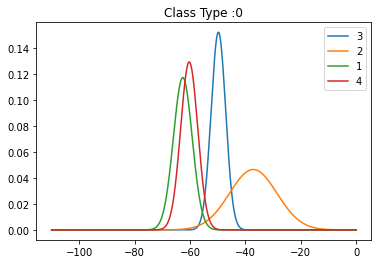

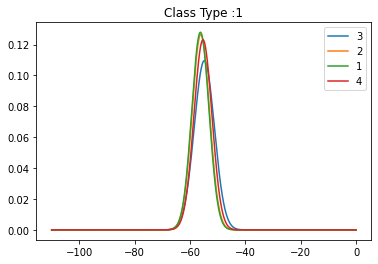

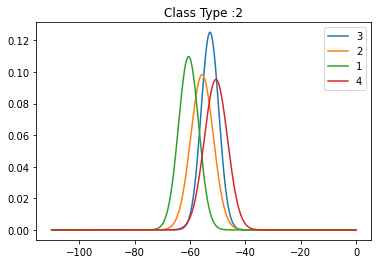

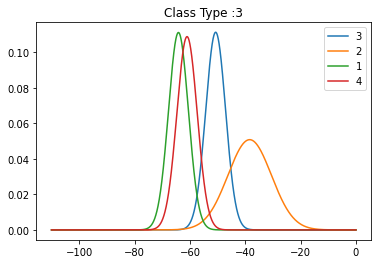

In [115]:
x_axis = np.arange(-110, 0, 0.01)
print(x_axis)
from scipy.stats import norm
for val in range(len(classes_index_dict)):
    st="Class Type :"+ str(val)
    plt.title(st)
    for c in unique_classes:
        plt.plot(x_axis,norm.pdf(x_axis, classes_index_dict[c][val][0], classes_index_dict[c][val][1]),label=c)
    # for p in mis_classified:
    #     plt.plot(X_test[f].iloc[p],0, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
    plt.legend(unique_classes)
    plt.show()

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

def plot_gaussian():
      
    # Plot between -10 and 10 with .001 steps.
    x_axis = np.arange(-20, 20, 0.01)
      
    # Calculating mean and standard deviation
    mean = statistics.mean(x_axis)
    sd = statistics.stdev(x_axis)
      
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
    plt.show()
    

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)
data_cols = data.columns
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [118]:
# your code here
classifier = GaussianNB()
classifier.fit(x_train, y_train)
#Evaluate the model:
print("Training Score :", classifier.score(x_train, y_train)*100)
print("Test Score :", classifier.score(x_test, y_test)*100)

Training Score : 100.0
Test Score : 100.0
